# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [29]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1) Is the distribution of body temperatures normal?

### We will first examine the normality of the temperature graphically by plotting a histogram

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


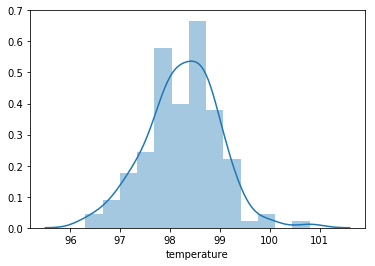

In [32]:
temp = df['temperature'];
sns.distplot(temp);

###### Looking at the graph, we see patterns of normal distribution, although it's not perfectly a bell-curve, it's a rough approximation.

### Let's plot another type and see if we can reach the same conclusion

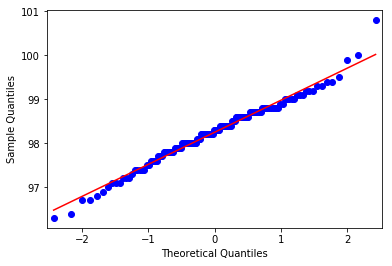

In [10]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(df['temperature'], line='s')
plt.show()

###### The QQ plot shows the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a normal distribution. There are a few small deviations, especially at the bottom and top of the plot, but we can safely say that the temperature roughly have normal distribution.

### Let's test this further

#### Null hypothesis is: The distribution of temperatures is normal.

#### Alternative hypothesis: The distribution of temperatures is not normal.

#### Since our p-value is greater than 0.05, we can NOT reject the null hypothesis with confidence.

In [35]:
# use a normal distribution test from SciPy

stats.normaltest(temp)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [11]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


# 2) Is the sample size large? Are the observations independent?

#### The sample size is 130, usually if the sample is greater than 30, it's considered large enough to apply the CLT. 
#### The observations are independent because body's temperature are not affected by another person's body temperature.

In [38]:
len(df)

130

# 3) Is the true population mean really 98.6 degrees F?

#### To test the hypothesis 
#### H0: population mean = 98.6 degrees F
#### HL: population mean < 96.8
#### We will use a one-sample test, because there is no  other group to campare with.
#### The t-test is appropriate here because to use a Z test, the population standard deviation must be available.
#### In our data set, only the polulation mean, sample mean and sample standard deviation are provided.
#### Since our p-value is less than 0.01, we cannot accept our null hypothesis with 99% confidence.


In [42]:
# t-test
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

#### The z-test is appropriate here as we are comparing the means from two different samples.
#### The correct test to use in the case of random sample of size=10 is a t-test. 
#### We notice that the statistic is 1 standard deviation in both tests. 
#### If we assume a confidence level of 95% or 1.96 standard deviations, then we fail to reject the null hypothesis in both tests.

#### However, our results are not stastically significant as our P-value is very high at ~0.30. 
#### This suggests that we can anticipate a high probability that we will observe test statistics greater than our results. 
#### In other words, a ~30% change we can observe a higher test statistic which can lead us to a different hypothesis acceptance.


In [50]:
#getting a random sample of 10 observations
np.random.seed(7)
rand_samp = np.random.choice(df['temperature'], size=10)
mu = 98.6

from statsmodels.stats.weightstats import ztest

#t-test, the more appropriate test with a sample size >30
rs_ttest,rs_t_pval = stats.ttest_1samp(a=rand_samp, popmean=mu)

#repeating with z-test
rs_zscore, rs_z_pval = ztest(rand_samp,value=98.6)

#results
print('Given the new sample, the T-Statistic is %d with a p-value of %s' %(abs(rs_ttest),rs_t_pval))
print('Given the new sample, the Z-Statistic is %d with a p-value of %s' %(abs(rs_zscore), rs_z_pval))

Given the new sample, the T-Statistic is 1 with a p-value of 0.30930267921950944
Given the new sample, the Z-Statistic is 1 with a p-value of 0.2812714328684113


# 5) At what temperature should we consider someone's temperature to be "abnormal"?

#### Given our confidence interval, we would consider someone's body temperature lower than 98.12 or higher than 98.37 to be considered abnormal. 

In [53]:
n=len(df['temperature'])
std_temp = np.std(df['temperature'])
mean_temp = np.mean(df['temperature'])
#standard error
std_error = std_temp / np.sqrt(n)
print('The standard error/margin of error is %s' %std_error)

#compute confidence interval at the 95% level
conf_int = stats.t.interval(alpha = .95, df = n-1, loc = mean_temp,
                 scale=stats.sem(df['temperature']))
print('At the 95% level, the lower bound of our confidence interval is ',conf_int[0], 
      ' and the upper bound is ',conf_int[1])

The standard error/margin of error is 0.06405661469519336
At the 95% level, the lower bound of our confidence interval is  98.12200290560804  and the upper bound is  98.37645863285351


# 6) Is there a significant difference between males and females in normal temperature?

#### We will use a 2-sample t-test to see if male body temperatures are significantly different compared to female body temperatures.

#### Null Hypothesis: Males and females have the same body temperature.

#### Alternative Hypothesis: Males and females have difference body temperatures. 

#### The p-value is < 0.05, so we can reject the null hypothesis with 95% confidence.

In [57]:
#we can again use a t-test as we are comparing the means from two samples
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']

print('Mean body temp of male samples: ', np.mean(male_temps))
print('Mean body temp of female samples: ', np.mean(female_temps))

gender_ttest, gender_pval = stats.ttest_ind(a=male_temps, b=female_temps, equal_var=False)
print('The T-Statistic is %d with a p-value of %s' %(abs(gender_ttest), gender_pval))

Mean body temp of male samples:  98.1046153846154
Mean body temp of female samples:  98.39384615384613
The T-Statistic is 2 with a p-value of 0.023938264182934196


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


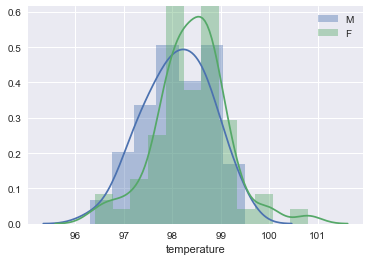

In [63]:
temp_gender_df = df[['temperature', 'gender']];
male_temp = temp_gender_df[temp_gender_df.gender=='M'];
female_temp = temp_gender_df[temp_gender_df.gender=='F'];

sns.distplot(male_temp['temperature'], label='M');
sns.distplot(female_temp['temperature'], label='F');
plt.legend();